In [7]:
import sys
sys.path.append('src')
# from Diabetes.config import data_diabetes
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [100]:
df= pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')


In [101]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
df.shape

(768, 9)

In [137]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [103]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [104]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [105]:

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [106]:
df.Glucose.fillna(df.Glucose.mean(), inplace = True)
df.BloodPressure.fillna(df.BloodPressure.mean(), inplace = True)
df.SkinThickness.fillna(df.SkinThickness.median(), inplace = True)
df.Insulin.fillna(df.Insulin.median(), inplace = True)
df.BMI.fillna(df.BMI.median(), inplace = True)

In [108]:
x = df.drop(["Outcome"],axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [109]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [110]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.133413,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.239130,0.133413,0.243354,0.115713,0.433333


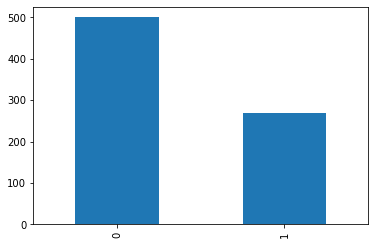

In [111]:
p=df.Outcome.value_counts().plot(kind='bar')

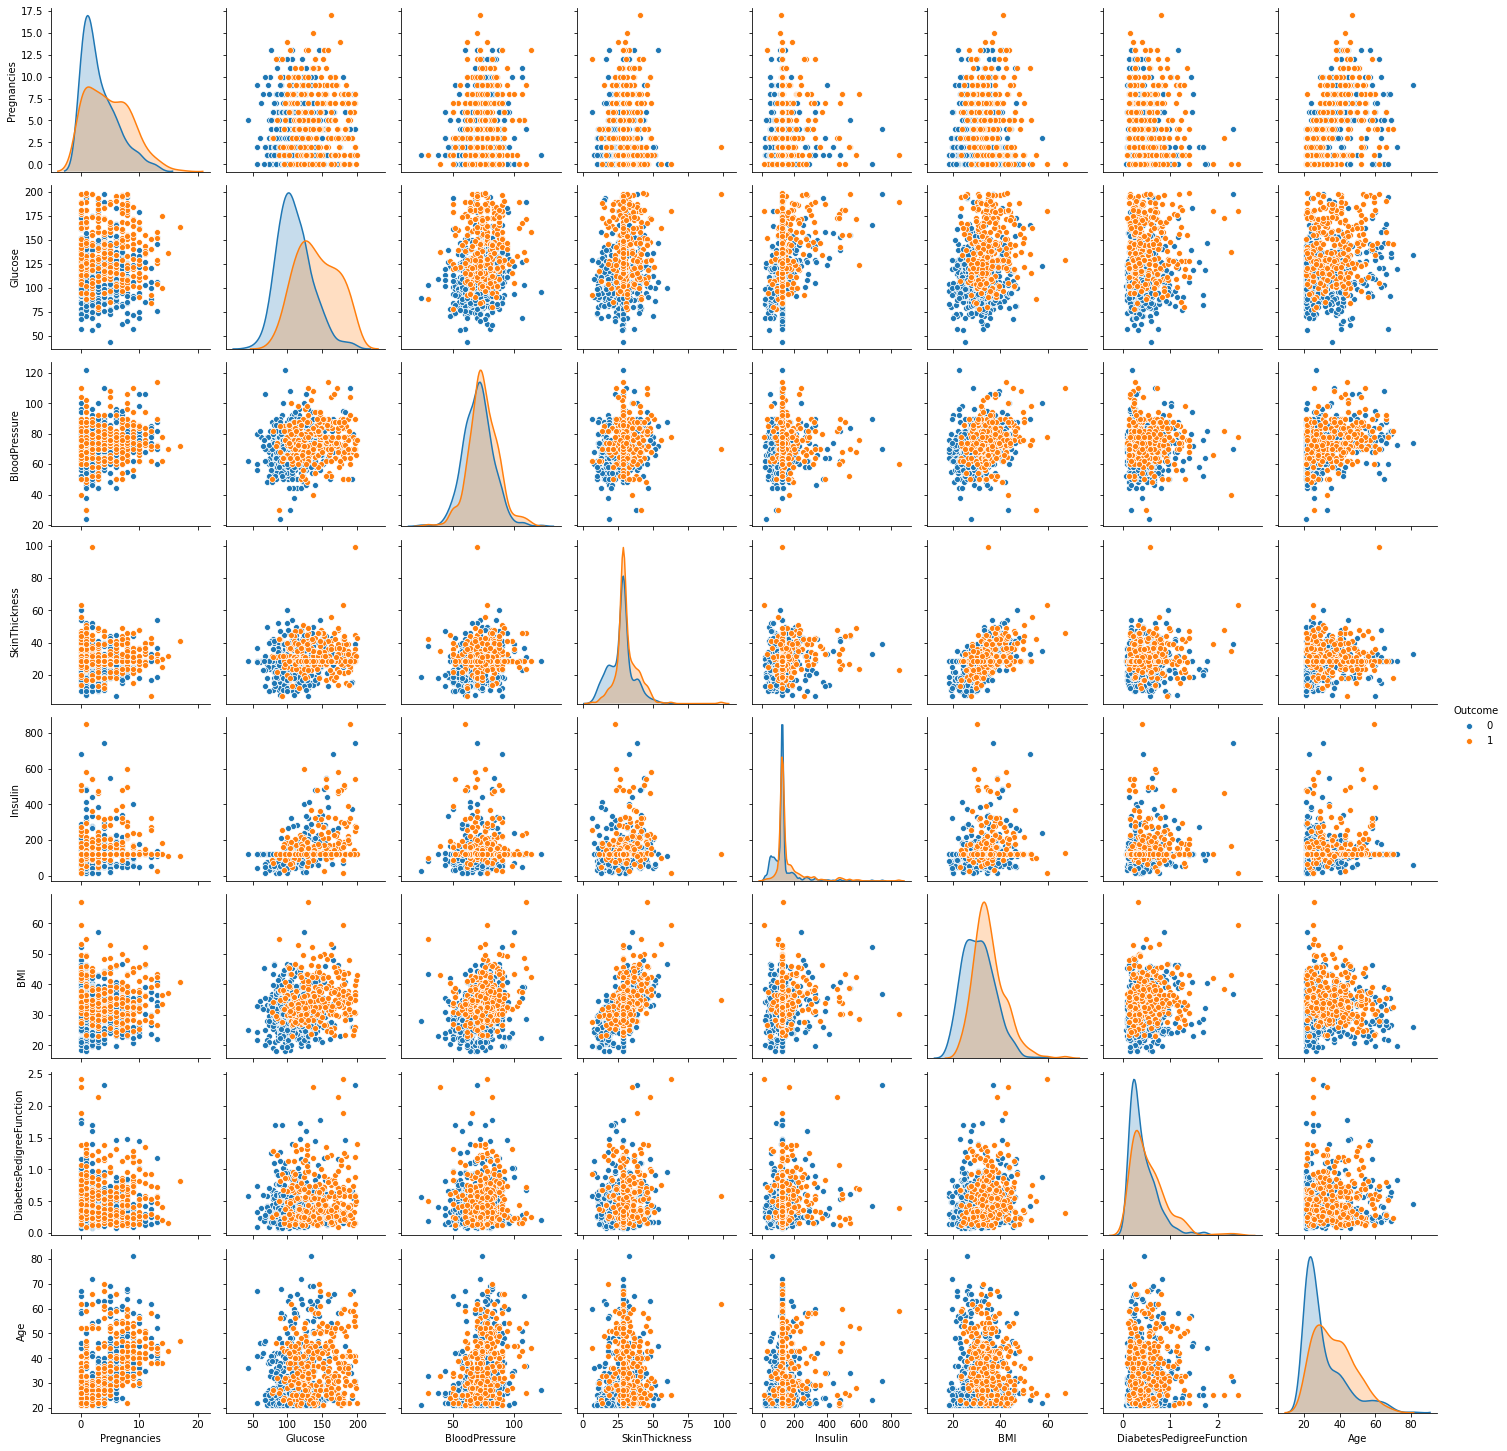

In [112]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df,hue = 'Outcome')

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("Changed of Features and Values place.")

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(614, 8)
(154, 8)
(614,)
(154,)
Changed of Features and Values place.
(8, 614)
(8, 154)
(614,)
(154,)


In [114]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8, 614)
(614,)
(8, 154)
(154,)


In [115]:
def initialize_weights_and_bias(dimension):
    #initialize
    w = np.full((dimension,1),0.01) 
    b=0.0
    return w,b

def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [116]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss =  -(1 - y_train) * np.log(1 - y_head) -y_train * np.log(y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    #backward propagation
    derivative_weight = (np.dot(x_train, ((y_head - y_train).T))) / x_train.shape[1] #derivative based on weight
    derivative_bias = np.sum(y_head - y_train ) / x_train.shape[1] #derivative based on bias
    
    #weight and bias are derivates kept in dictionary(gradients)
    gradients = {"derivative_weight": derivative_weight, "derivative_bias":derivative_bias}
    
    return cost,gradients

In [117]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    return parameters, gradients, cost_list

In [118]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    #initialize
    dimension =  x_train.shape[0] 
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    
    #update method for forward and backward propagation
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    

    # Print train/test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

In [119]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 5, num_iterations = 300)

Cost after iteration 0: 0.695170
Cost after iteration 10: 0.605780
Cost after iteration 20: 0.536715
Cost after iteration 30: 0.502518
Cost after iteration 40: 0.489364
Cost after iteration 50: 0.481738
Cost after iteration 60: 0.476672
Cost after iteration 70: 0.473161
Cost after iteration 80: 0.470646
Cost after iteration 90: 0.468798
Cost after iteration 100: 0.467409
Cost after iteration 110: 0.466346
Cost after iteration 120: 0.465520
Cost after iteration 130: 0.464868
Cost after iteration 140: 0.464348
Cost after iteration 150: 0.463928
Cost after iteration 160: 0.463586
Cost after iteration 170: 0.463304
Cost after iteration 180: 0.463071
Cost after iteration 190: 0.462877
Cost after iteration 200: 0.462713
Cost after iteration 210: 0.462575
Cost after iteration 220: 0.462458
Cost after iteration 230: 0.462358
Cost after iteration 240: 0.462272
Cost after iteration 250: 0.462199
Cost after iteration 260: 0.462135
Cost after iteration 270: 0.462080
Cost after iteration 280: 0.462

In [120]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
kf.get_n_splits(x)
print(kf)
KFold(n_splits=4, random_state=None, shuffle=False)

KFold(n_splits=4, random_state=None, shuffle=False)


KFold(n_splits=4, random_state=None, shuffle=False)

In [121]:
lr=LogisticRegression()
lr=lr.fit(x,y)
y_pred = lr.predict(x_test.T)
print("Test Accuracy : {}".format(lr.score(x_test.T,y_test.T)))
print("Train Accuracy : {}".format(lr.score(x_train.T,y_train.T)))

Test Accuracy : 0.7857142857142857
Train Accuracy : 0.7671009771986971


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test.T,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [124]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
cm =  confusion_matrix(y_test.T,y_pred)
print('confusion matrix:')
print(cm)

confusion matrix:
[[87 12]
 [21 34]]


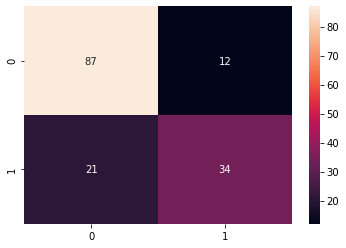

In [125]:
sns.heatmap(cm, annot=True)

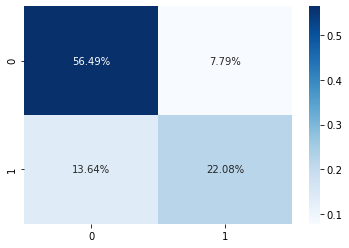

In [126]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

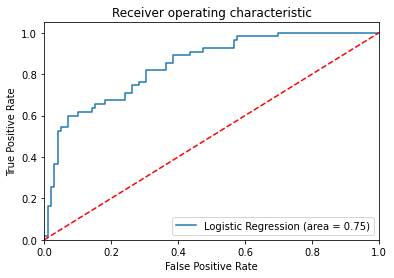

In [136]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test.T))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test.T)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()